In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import matplotlib as mpl

omega = 0.2
lam = 10
alfa = np.sqrt(omega)
k = omega**2
dt = 0.1
N = 300
x = np.linspace(-20, 20, N)
dx = x[1] - x[0]
t = np.arange(0, 2 * 2 * np.pi / omega, dt)
Nt = len(t)

def Gauss(x, alfa, lam):
    return np.sqrt(alfa/np.sqrt(np.pi)) * np.exp(-alfa**2/2 * (x-lam)**2)

def Harmonicni_potencial(x, k):
    return 0.5 * k * x**2

def analiticna_resitev_harm(x, t, omega, lam):
    alfa = np.sqrt(omega)
    ksi = alfa * x
    ksi_lam = alfa * lam

    C = np.sqrt(alfa/np.sqrt(np.pi))
    Re = -0.5 * (ksi - ksi_lam * np.cos(omega * t))**2
    Im = -(0.5 * omega * t + ksi * ksi_lam * np.sin(omega * t) - 0.25 * ksi_lam**2 * np.sin(2 * omega * t))

    return C * np.exp(Re + 1j * Im)

def Crank_Nicolson(f_0, args_f_0, Pot, args_Pot, dx, x, dt, t):
    N = len(x)
    V = Pot(x, *args_Pot)
    A = np.zeros((N, N), dtype=complex)
    b = 1j * dt / (2 * dx**2)
    a = -b / 2
    for i in range(N):
        A[i, i] = 1 + b + 1j * dt / 2 * V[i]
        if i > 0:
            A[i, i - 1] = a
        if i < N - 1:
            A[i, i + 1] = a
    
    A_star = np.conjugate(A)
    Psi_0 = f_0(x, *args_f_0)
    Psi_t = [Psi_0]
    
    for i in range(len(t)):
        Psi_i = np.linalg.solve(A, np.matmul(A_star, Psi_t[i]))
        Psi_t.append(Psi_i)
    
    return np.array(Psi_t)


In [28]:

Psi_t_CN = Crank_Nicolson(Gauss, [alfa, lam], Harmonicni_potencial, [k], dx, x, dt, t)
Psi_t_CN = np.array(Psi_t_CN)


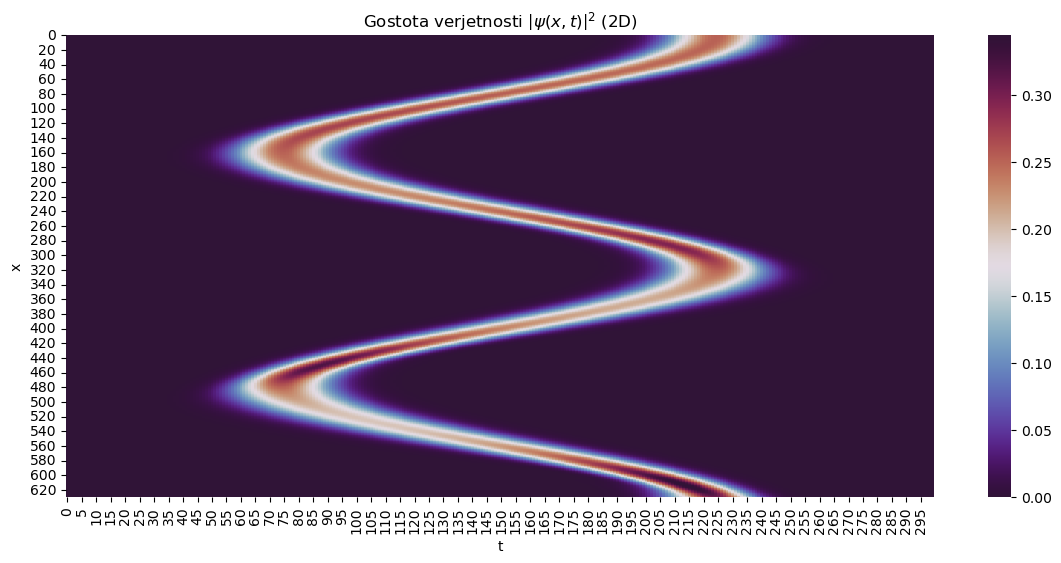

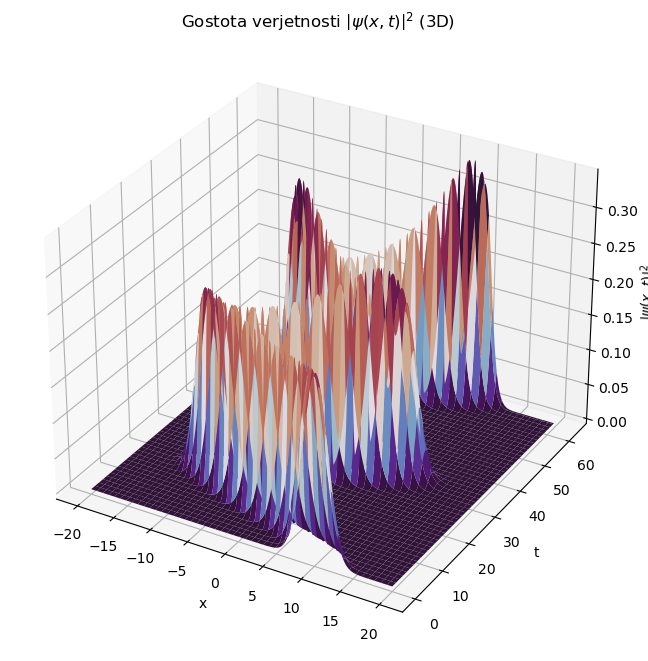

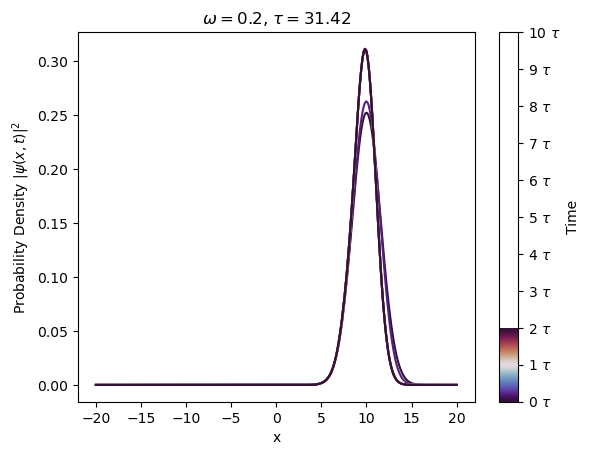

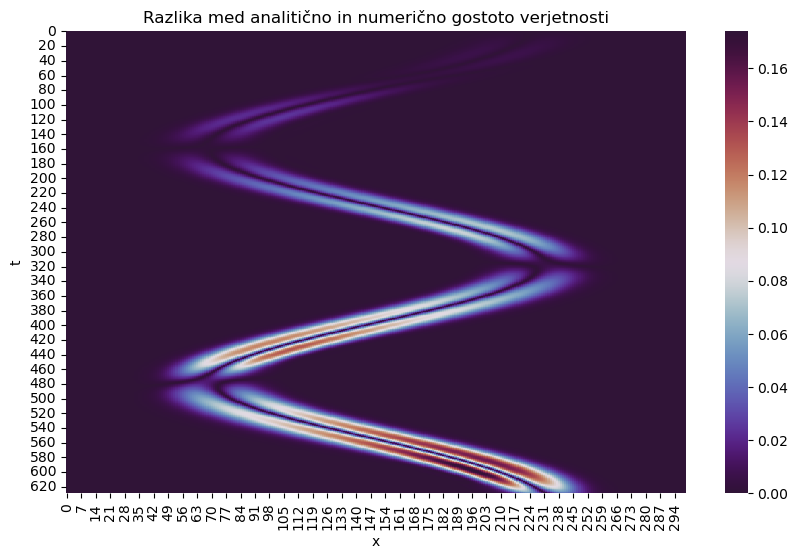

In [29]:
Psi_t_CN_abs2 = np.abs(Psi_t_CN)**2

fig, ax = plt.subplots(figsize=(14, 6))
sns.heatmap(np.abs(Psi_t_CN)**2, cmap='twilight_shifted', ax=ax)
ax.set_title(r'Gostota verjetnosti $\left|\psi(x,t)\right|^2$ (2D)')
ax.set_xlabel('t')
ax.set_ylabel('x')
plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

X, T = np.meshgrid(x, t)
Z = np.abs(Psi_t_CN)**2

if Z.shape[0] != len(t) or Z.shape[1] != len(x):
    Z = Z[:len(t), :len(x)]  

ax.plot_surface(X, T, Z, cmap='twilight_shifted')
ax.set_title(r'Gostota verjetnosti $\left|\psi(x,t)\right|^2$ (3D)')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel(r'$\left|\psi(x,t)\right|^2$')
plt.show()


Psi_t_analiticna_abs2 = np.abs(Psi_t_CN)**2
Psi_t_analiticna = analiticna_resitev_harm(X, T, omega, lam)
Psi_t_analiticna_abs2 = np.abs(Psi_t_analiticna)**2

t0 = 2 * np.pi / omega
t0sez = [n * t0 for n in range(11)]  
indexi = [np.argmin(np.abs(t - time)) for time in t0sez]

fig, ax = plt.subplots()
colors = cm.twilight_shifted(np.linspace(0, 1, len(indexi)))
for i, ind in enumerate(indexi):
    ax.plot(x, Psi_t_CN_abs2[ind], color=colors[i])

norm = mpl.colors.Normalize(vmin=0, vmax=max(t))
smap = cm.ScalarMappable(norm=norm, cmap='twilight_shifted')
cbar = plt.colorbar(smap, ax=ax, label='Time')
cbar.set_ticks(t0sez)
cbar.set_ticklabels([rf'{i} $\tau$' for i in range(len(t0sez))])

ax.set_xlabel('x')
ax.set_ylabel(r'Probability Density $|\psi(x, t)|^2$')
plt.title(rf'$\omega = 0.2$, $\tau = {round(t0, 2)}$')
plt.show()

diff = np.abs(Psi_t_CN_abs2[1:,:] - Psi_t_analiticna_abs2)

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(diff, cmap='twilight_shifted', ax=ax)
ax.set_title(r'Razlika med analitično in numerično gostoto verjetnosti')
ax.set_xlabel('x')
ax.set_ylabel('t')
plt.show()

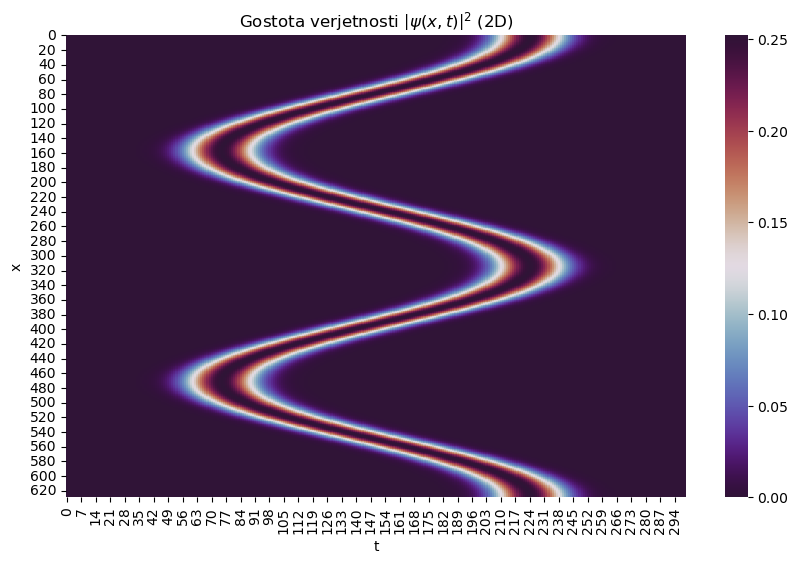

In [30]:
X, T = np.meshgrid(x, t)
Psi_t_analiticna = analiticna_resitev_harm(X, T, omega, lam)
Psi_t_analiticna_abs2 = np.abs(Psi_t_analiticna)**2

colors = cm.twilight_shifted(np.linspace(0, 1, len(indexi)))



fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(np.abs(Psi_t_analiticna)**2, cmap='twilight_shifted', ax=ax)
ax.set_title(r'Gostota verjetnosti $\left|\psi(x,t)\right|^2$ (2D)')
ax.set_xlabel('t')
ax.set_ylabel('x')
plt.show()


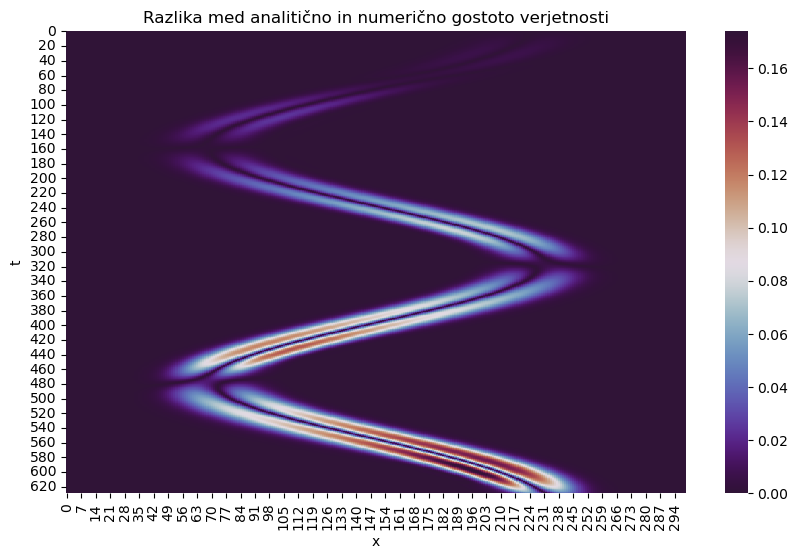

In [31]:
diff = np.abs(Psi_t_CN_abs2[1:,:] - Psi_t_analiticna_abs2)

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(diff, cmap='twilight_shifted', ax=ax)
ax.set_title(r'Razlika med analitično in numerično gostoto verjetnosti')
ax.set_xlabel('x')
ax.set_ylabel('t')
plt.show()

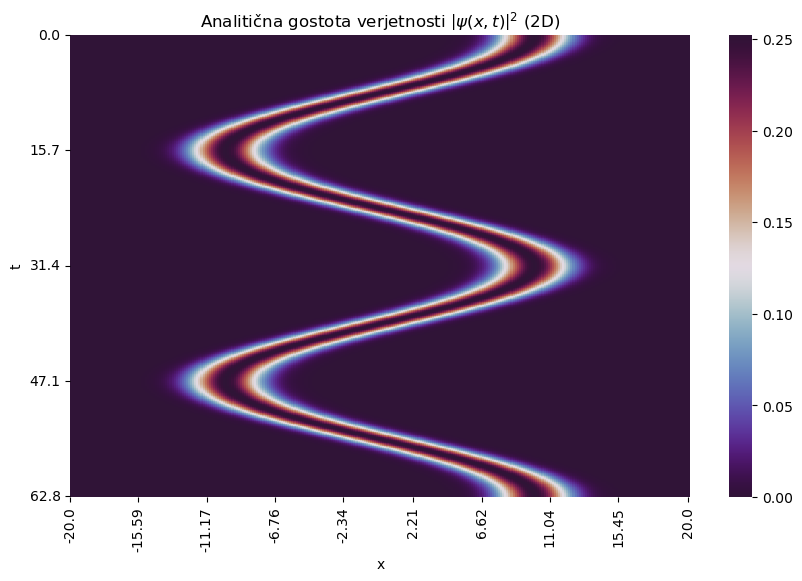

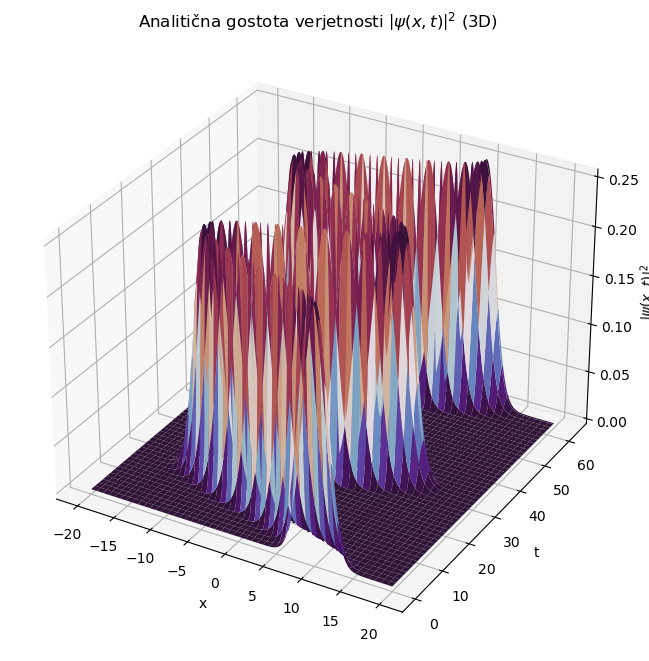

In [32]:
# Analytical and numerical probability density
Psi_t_analiticna = analiticna_resitev_harm(X, T, omega, lam)
Psi_t_analiticna_abs2 = np.abs(Psi_t_analiticna)**2
Psi_t_CN_abs2 = np.abs(Psi_t_CN)**2

# Heatmap for analytical solution with adjusted axes
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(Psi_t_analiticna_abs2, cmap='twilight_shifted', ax=ax)

# Adjusting the ticks for heatmap to match the 3D plot axes
x_tick_indices = np.linspace(0, len(x) - 1, 10).astype(int)  
t_tick_indices = np.linspace(0, len(t) - 1, 5).astype(int)  
ax.set_xticks(x_tick_indices)
ax.set_xticklabels(np.round(x[x_tick_indices], 2))
ax.set_yticks(t_tick_indices)
ax.set_yticklabels(np.round(t[t_tick_indices], 2))

ax.set_title(r'Analitična gostota verjetnosti $\left|\psi(x,t)\right|^2$ (2D)')
ax.set_xlabel('x')
ax.set_ylabel('t')
plt.savefig('analiticna res 2d')

plt.show()

# 3D Surface plot for the analytical solution
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

X, T = np.meshgrid(x, t)
Z_analytical = Psi_t_analiticna_abs2

if Z_analytical.shape[0] != len(t) or Z_analytical.shape[1] != len(x):
    Z_analytical = Z_analytical[:len(t), :len(x)]

ax.plot_surface(X, T, Z_analytical, cmap='twilight_shifted')
ax.set_title(r'Analitična gostota verjetnosti $\left|\psi(x,t)\right|^2$ (3D)')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel(r'$\left|\psi(x,t)\right|^2$')
plt.savefig('analiticna res 3d')
plt.show()


In [33]:
omega = 0.2
lam = 10
alfa = np.sqrt(omega)
k = omega**2
dt = 0.1
N = 300
x = np.linspace(-20, 20, N)
dx = x[1] - x[0]

periods = [2, 4, 6, 8, 10]

for num_periods in periods:

    T = 2 * np.pi / omega  
    t = np.arange(0, num_periods * T, dt)  
    tau = t / T  

    Psi_t_CN = Crank_Nicolson(Gauss, [alfa, lam], Harmonicni_potencial, [k], dx, x, dt, t)
    Psi_t_CN = np.array(Psi_t_CN)
    Psi_t_CN_abs2 = np.abs(Psi_t_CN)**2

    Psi_t_analiticna = analiticna_resitev_harm(x, t, omega, lam)
    Psi_t_analiticna_abs2 = np.abs(Psi_t_analiticna)**2

    diff = np.abs(Psi_t_CN_abs2[1:, :] - Psi_t_analiticna_abs2.T)

    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    fig.suptitle(f'Plots for {num_periods} Periods')

    # Plot 1: Probability Density Heatmap
    sns.heatmap(np.abs(Psi_t_CN)**2, cmap='twilight_shifted', ax=axes[0], cbar_kws={'label': r'Verjetnostna gostota $\left|\psi(x,t)\right|^2$'})
    axes[0].set_title(r'Verjetnostna gostota $\left|\psi(x,t)\right|^2$')

    axes[0].set_xlabel('x')
    axes[0].set_ylabel(r'$\tau$')
    x_tick_indices = np.linspace(0, len(x) - 1, 5).astype(int)  
    tau_tick_indices = np.linspace(0, len(tau) - 1, 5).astype(int)  
    axes[0].set_xticks(x_tick_indices)
    axes[0].set_xticklabels(np.round(x[x_tick_indices], 2))
    axes[0].set_yticks(tau_tick_indices)
    axes[0].set_yticklabels(np.round(tau[tau_tick_indices], 2))

    tau_indices_full_range = np.linspace(0, len(tau) - 1, 11).astype(int)  
    colors = cm.twilight_shifted(np.linspace(0, 1, len(tau_indices_full_range)))  

    for i, ind in enumerate(tau_indices_full_range):
        axes[1].plot(x, Psi_t_CN_abs2[ind], color=colors[i])

    norm = mpl.colors.Normalize(vmin=min(tau[tau_indices_full_range]), vmax=max(tau[tau_indices_full_range]))
    smap = cm.ScalarMappable(norm=norm, cmap='twilight_shifted')
    cbar = plt.colorbar(smap, ax=axes[1], label=r'Čas $\tau$')
    cbar.set_ticks(tau[tau_indices_full_range])
    cbar.set_ticklabels([rf'{i} $\tau$' for i in range(len(tau_indices_full_range))])
    axes[1].set_title(rf'2D prikaz verjetnostne gostote $\omega = 0.2$, $\tau = {round(T, 2)}$')
    axes[1].set_xlabel('x')
    axes[1].set_ylabel(r'Verjetnostna gostota $|\psi(x, \tau)|^2$')

    sns.heatmap(diff, cmap='twilight_shifted', ax=axes[2], cbar_kws={'label': 'Absolutna napaka'})
    axes[2].set_title(r'$|\left|\psi_{anal}\right| - \left|\psi_{num}\right||$')

    axes[2].set_xlabel('x')
    axes[2].set_ylabel(r'$\tau$')

    tau_tick_indices_diff = np.linspace(0, len(tau) - 2, 5).astype(int)  
    axes[2].set_xticks(x_tick_indices)
    axes[2].set_xticklabels(np.round(x[x_tick_indices], 2))
    axes[2].set_yticks(tau_tick_indices_diff)
    axes[2].set_yticklabels(np.round(tau[1:][tau_tick_indices_diff], 2))  

    plt.tight_layout()
    
    filename = f'plots_for_{num_periods}_periods.png'
    plt.savefig(filename)
    print(f"Saved figure as {filename}")

    plt.show()


ValueError: operands could not be broadcast together with shapes (300,) (629,) 

In [ ]:
#def zac_stanje_gauss(x, sigma_0, k_0, lam):
#    return (2 * np.pi * sigma_0**2)**(-0.25) * np.exp(1j * k_0 * (x - lam)) * np.exp(-((x - lam)**2) / (4 * sigma_0**2))
#
#def gauss_val_paket(x, t, sigma_0, k_0, lam):
#    denominator = 1+ 1j * t / (2 * sigma_0)
#    exponent = -(x-lam) ** 2 / (4 * sigma_0 ** 2) + 1j * k_0 * (x - lam) - 1j * k_0 ** 2 * t / 2
#    return ((2* np.pi * sigma_0 ** 2) ** (-1/4)) / np.sqrt(denominator) * np.exp(exponent / denominator)
#"""    sigma_t = np.sqrt(1 + 1j * t / (2 * sigma_0**2))
#    faza = 1j * k_0**2 * t / 2
#    gauss_ovoj = -(x - lam)**2 / (4 * sigma_0**2)
#    return (2 * np.pi * sigma_0**2)**(-0.25) / sigma_t * np.exp(
#        (gauss_ovoj + 1j * k_0 * (x - lam) - faza) / (1 + 1j * t / (2 * sigma_0**2))
#    )"""
#
#def Crank_Nicolson_Free(f_0, args_f_0, dx, x, dt, t):
#    N = len(x)
#    V = np.zeros(N)  
#    b = 1j * dt / (2 * dx**2)
#    a = -b / 2
#    A = np.zeros((N, N), dtype=complex)
#    for i in range(N):
#        A[i, i] = 1 + b
#        if i > 0:
#            A[i, i - 1] = a
#        if i < N - 1:
#            A[i, i + 1] = a
#
#    A_star = np.conjugate(A)
#    Psi_0 = f_0(x, *args_f_0)
#    Psi_t = [Psi_0]
#    
#    for i in range(len(t)):
#        Psi_i = np.linalg.solve(A, np.matmul(A_star, Psi_t[i]))
#        Psi_t.append(Psi_i)
#    
#    return np.array(Psi_t)
#
## Parameters
#sigma_0 = 1 / 20
#k_0 = 50 * np.pi
#lam = 0.25
#a, b = -0.5, 1.5
#N = 300
#x = np.linspace(a, b, N)
#dx = (b - a) / (N - 1)
#dt = 2 * dx**2
#t = np.arange(0, 0.01, dt)
#X, T = np.meshgrid(x, t)
#
#
#Psi_t_CN_Free = Crank_Nicolson_Free(zac_stanje_gauss, [sigma_0, k_0, lam], dx, x, dt, t)
#Psi_t_CN_Free = np.array(Psi_t_CN_Free)
#
#Psi_t_CN_Free_abs2 = np.abs(Psi_t_CN_Free)**2
#
#Psi_t_anal = gauss_val_paket(X, T, sigma_0, k_0, lam)
#Psi_t_anal_abs = np.abs(Psi_t_anal)**2
#print(np.max(Psi_t_anal_abs))
#
#fig, ax = plt.subplots(figsize=(10, 6))
#sns.heatmap(np.abs(Psi_t_CN_Free)**2, cmap='twilight_shifted', ax=ax)
#ax.set_title(r'Gostota verjetnosti $\left|\psi(x,t)\right|^2$ (2D)')
#ax.set_xlabel('t')
#ax.set_ylabel('x')
#plt.show()
#
#fig = plt.figure(figsize=(10, 8))
#ax = fig.add_subplot(111, projection='3d')
#
#Z = np.abs(Psi_t_CN_Free)**2
#
#if Z.shape[0] != len(t) or Z.shape[1] != len(x):
#    Z = Z[:len(t), :len(x)]
#
#ax.plot_surface(X, T, Z, cmap='twilight_shifted')
#ax.set_title(r'Gostota verjetnosti $\left|\psi(x,t)\right|^2$ (3D)')
#ax.set_xlabel('x')
#ax.set_ylabel('t')
#ax.set_zlabel(r'$\left|\psi(x,t)\right|^2$')
#plt.show()
#
#time_snapshots = np.linspace(0, max(t), 11)  
#indexi = [np.argmin(np.abs(t - time)) for time in time_snapshots]
#
#fig, ax = plt.subplots()
#colors = plt.cm.twilight_shifted(np.linspace(0, 1, len(indexi)))
#for i, ind in enumerate(indexi):
#    ax.plot(x, Psi_t_CN_Free_abs2[ind], color=colors[i])
#
#norm = plt.Normalize(vmin=0, vmax=max(t))
#smap = plt.cm.ScalarMappable(norm=norm, cmap='twilight_shifted')
#cbar = plt.colorbar(smap, ax=ax, label='Time')
#cbar.set_ticks(time_snapshots)
#cbar.set_ticklabels([f'{t_val:.2f}' for t_val in time_snapshots])
#
#ax.set_xlabel('x')
#ax.set_ylabel(r'Probability Density $|\psi(x, t)|^2$')
#plt.title(rf'$\sigma_0 = {sigma_0}$, $k_0 = {k_0}$')
#plt.show()
#
#fig, ax = plt.subplots()
#ax.contourf(X,T,Psi_t_anal_abs)
##sns.heatmap(Psi_t_anal_abs)
#ax.set_xlabel('x')
#ax.set_ylabel('t')
#plt.show()

Saved figure as plots_for_N_100.png


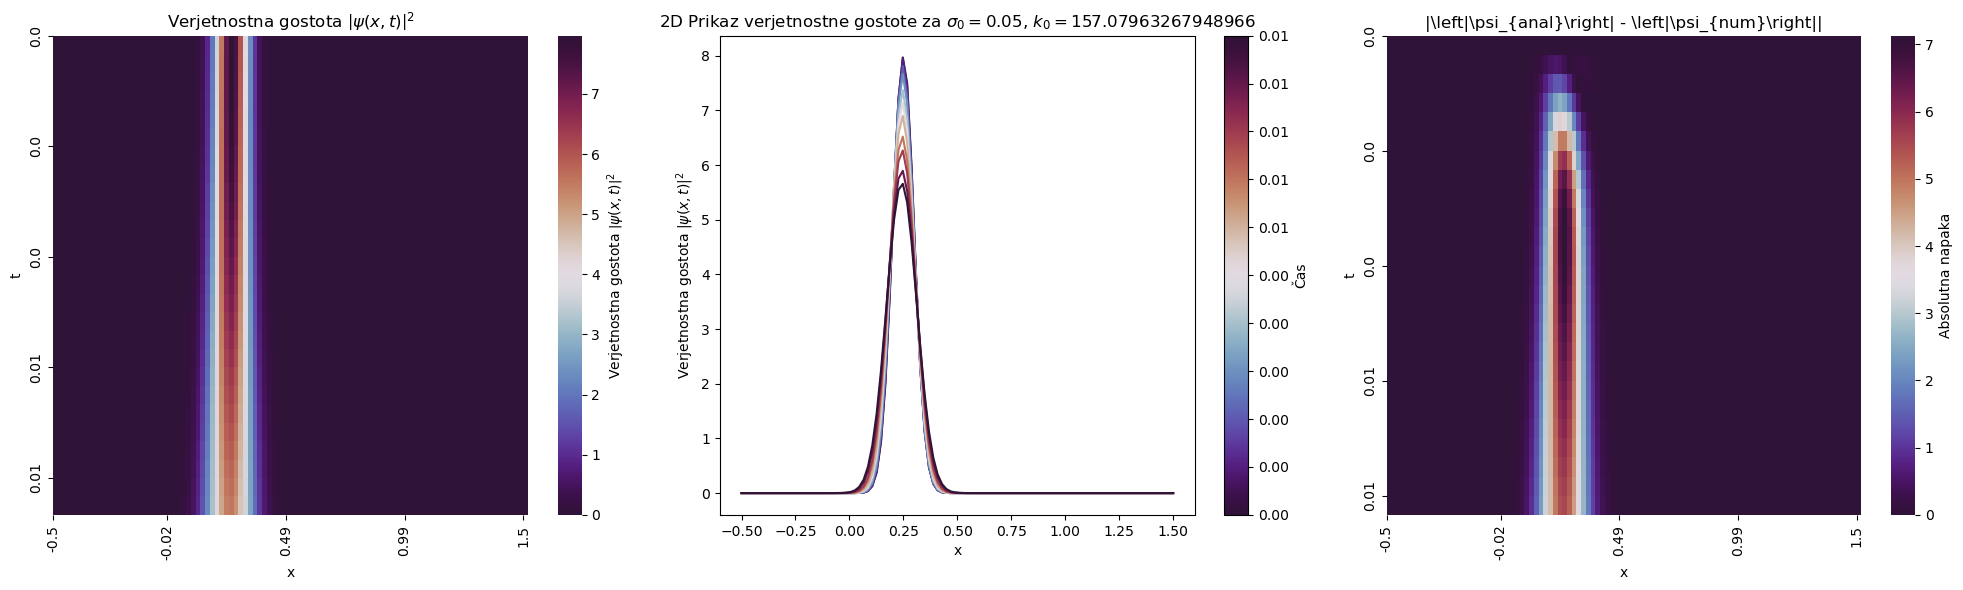

Saved figure as plots_for_N_200.png


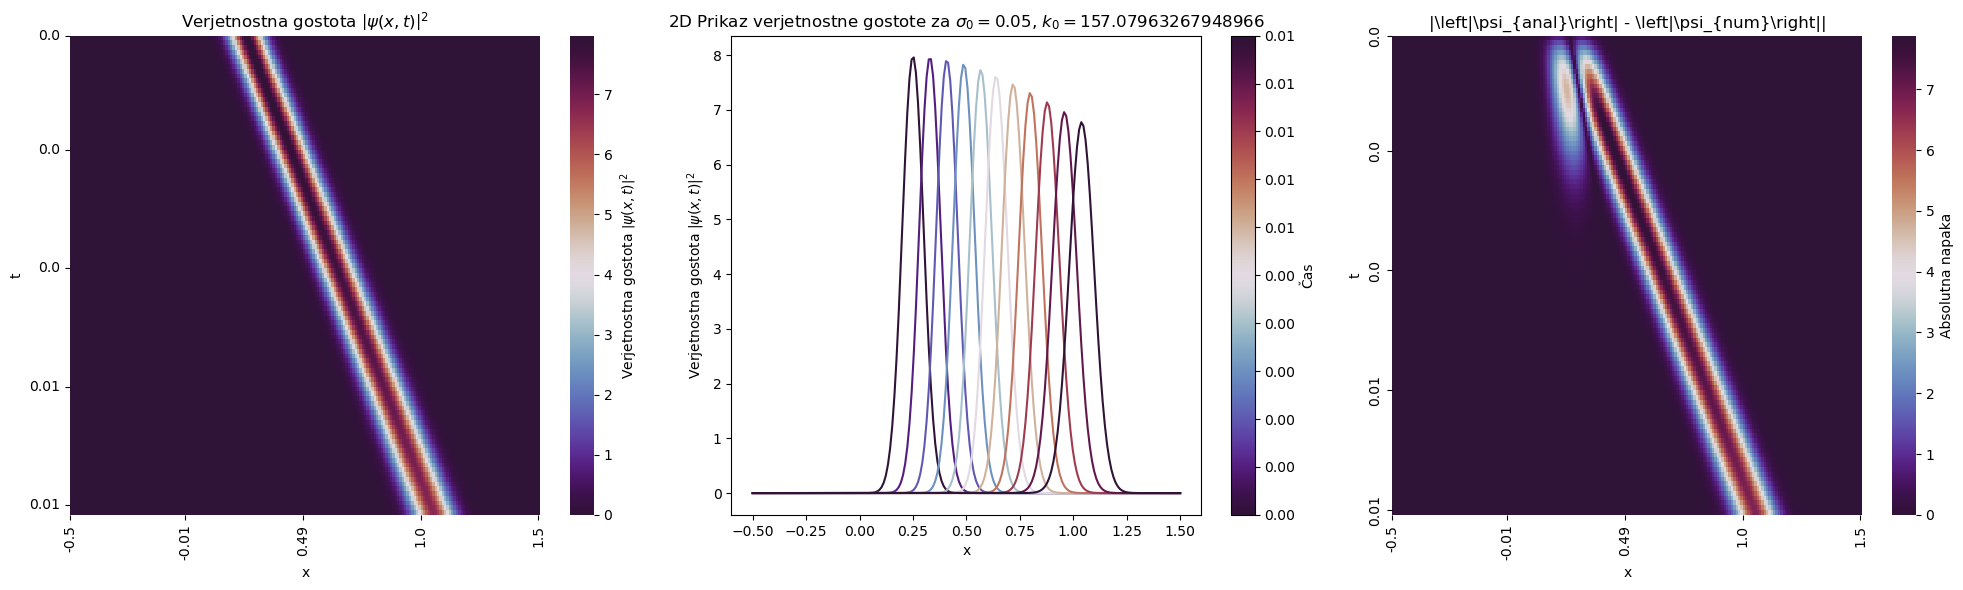

Saved figure as plots_for_N_300.png


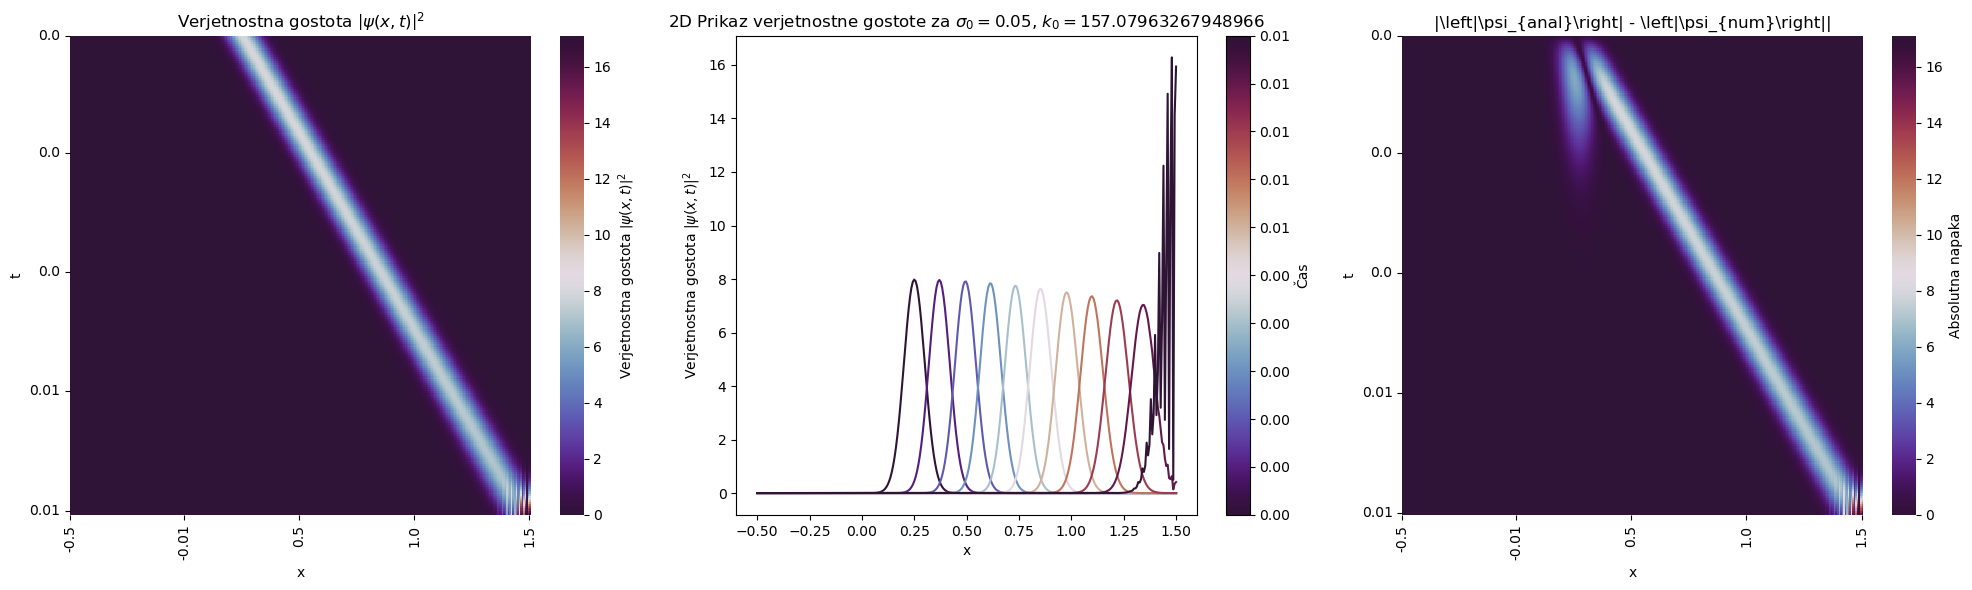

Saved figure as plots_for_N_400.png


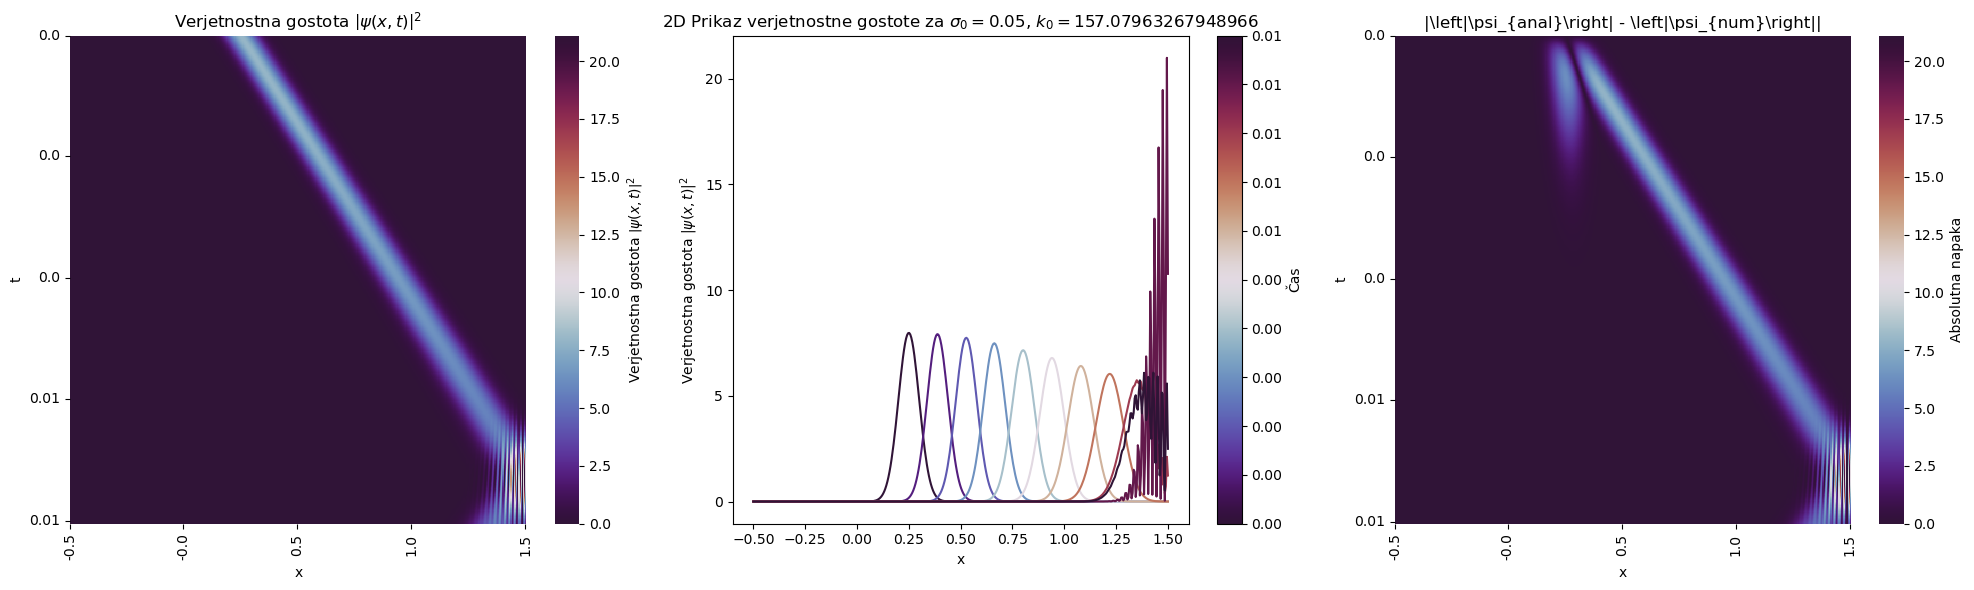

Saved figure as plots_for_N_500.png


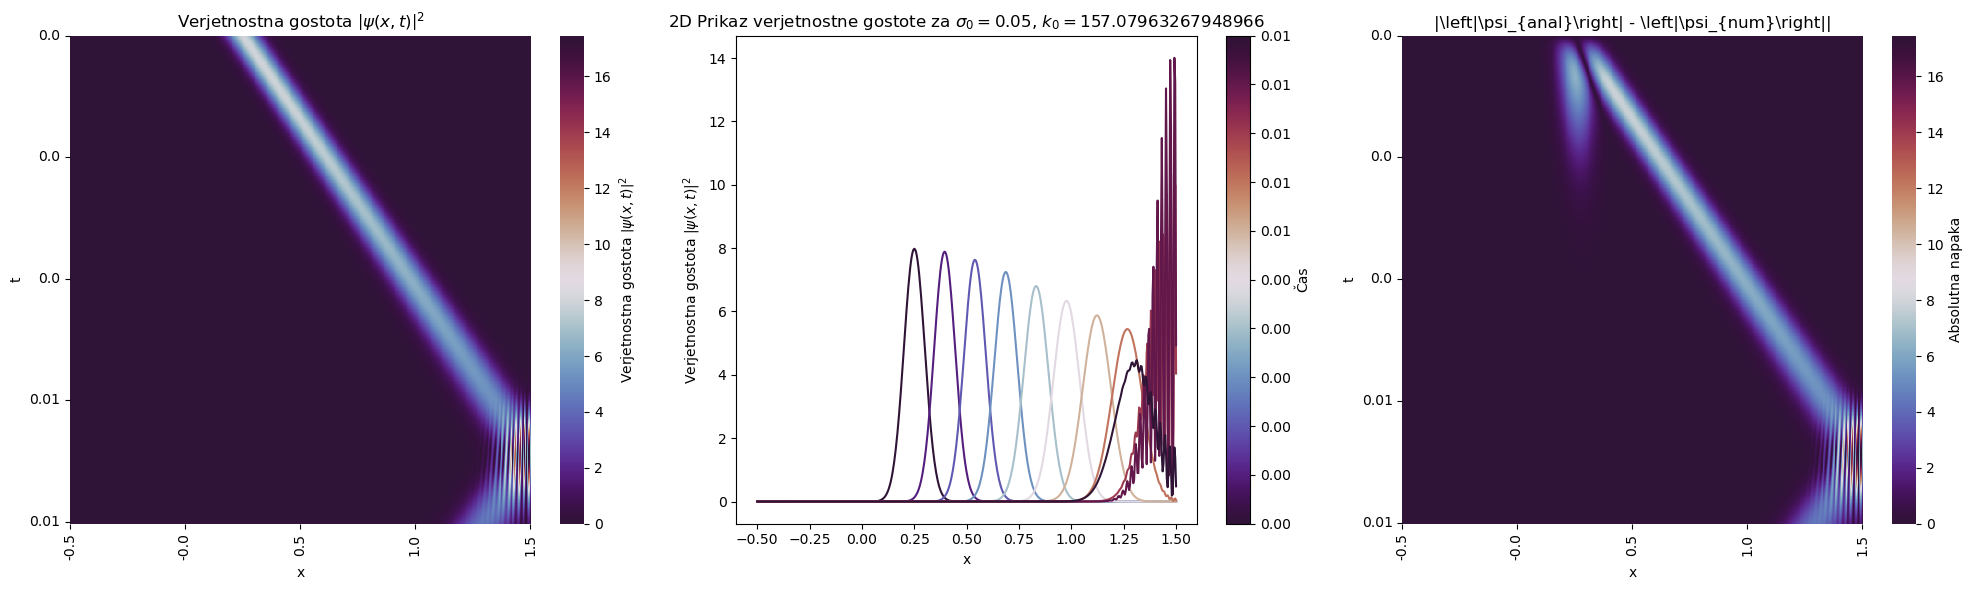

In [35]:

def zac_stanje_gauss(x, sigma_0, k_0, lam):
    return (2 * np.pi * sigma_0**2)**(-0.25) * np.exp(1j * k_0 * (x - lam)) * np.exp(-((x - lam)**2) / (4 * sigma_0**2))

def gauss_val_paket(x, t, sigma_0, k_0, lam):
    denominator = 1+ 1j * t / (2 * sigma_0)
    exponent = -(x-lam) ** 2 / (4 * sigma_0 ** 2) + 1j * k_0 * (x - lam) - 1j * k_0 ** 2 * t / 2
    return ((2* np.pi * sigma_0 ** 2) ** (-1/4)) / np.sqrt(denominator) * np.exp(exponent / denominator)
"""    sigma_t = np.sqrt(1 + 1j * t / (2 * sigma_0**2))
    faza = 1j * k_0**2 * t / 2
    gauss_ovoj = -(x - lam)**2 / (4 * sigma_0**2)
    return (2 * np.pi * sigma_0**2)**(-0.25) / sigma_t * np.exp(
        (gauss_ovoj + 1j * k_0 * (x - lam) - faza) / (1 + 1j * t / (2 * sigma_0**2))
    )"""

def Crank_Nicolson_Free(f_0, args_f_0, dx, x, dt, t):
    N = len(x)
    V = np.zeros(N) 
    b = 1j * dt / (2 * dx**2)
    a = -b / 2
    A = np.zeros((N, N), dtype=complex)
    for i in range(N):
        A[i, i] = 1 + b
        if i > 0:
            A[i, i - 1] = a
        if i < N - 1:
            A[i, i + 1] = a

    A_star = np.conjugate(A)
    Psi_0 = f_0(x, *args_f_0)
    Psi_t = [Psi_0]
    
    for i in range(len(t)):
        Psi_i = np.linalg.solve(A, np.matmul(A_star, Psi_t[i]))
        Psi_t.append(Psi_i)
    
    return np.array(Psi_t)


sigma_0 = 1 / 20
k_0 = 50 * np.pi
lam = 0.25
a, b = -0.5, 1.5

N_values = [100, 200, 300, 400, 500]

for N in N_values:
    x = np.linspace(a, b, N)
    dx = (b - a) / (N - 1)
    dt = 1 * dx**2
    t = np.arange(0, 0.01, dt)
    X, T = np.meshgrid(x, t)

    Psi_t_CN_Free = Crank_Nicolson_Free(zac_stanje_gauss, [sigma_0, k_0, lam], dx, x, dt, t)
    Psi_t_CN_Free = np.array(Psi_t_CN_Free)

    Psi_t_CN_Free_abs2 = np.abs(Psi_t_CN_Free)**2

    Psi_t_anal = gauss_val_paket(X, T, sigma_0, k_0, lam)
    Psi_t_anal_abs = np.abs(Psi_t_anal)**2

    diff = np.abs(Psi_t_CN_Free_abs2[1::] - Psi_t_anal_abs)

    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    sns.heatmap(Psi_t_CN_Free_abs2, cmap='twilight_shifted', ax=axes[0], cbar_kws={'label': r'Verjetnostna gostota $\left|\psi(x,t)\right|^2$'})
    axes[0].set_title(r'Verjetnostna gostota $\left|\psi(x,t)\right|^2$')

    axes[0].set_xlabel('x')
    axes[0].set_ylabel('t')
    x_tick_indices = np.linspace(0, len(x) - 1, 5).astype(int)  
    t_tick_indices = np.linspace(0, len(t) - 1, 5).astype(int)  
    axes[0].set_xticks(x_tick_indices)
    axes[0].set_xticklabels(np.round(x[x_tick_indices], 2))
    axes[0].set_yticks(t_tick_indices)
    axes[0].set_yticklabels(np.round(t[t_tick_indices], 2))

    time_snapshots = np.linspace(0, max(t), 11)  
    indices = [np.argmin(np.abs(t - time)) for time in time_snapshots]
    colors = plt.cm.twilight_shifted(np.linspace(0, 1, len(indices)))

    for i, ind in enumerate(indices):
        axes[1].plot(x, Psi_t_CN_Free_abs2[ind], color=colors[i])

    norm = plt.Normalize(vmin=0, vmax=max(t))
    smap = plt.cm.ScalarMappable(norm=norm, cmap='twilight_shifted')
    cbar = plt.colorbar(smap, ax=axes[1], label='Čas')
    cbar.set_ticks(time_snapshots)
    cbar.set_ticklabels([f'{t_val:.2f}' for t_val in time_snapshots])
    axes[1].set_title(rf'2D Prikaz verjetnostne gostote za $\sigma_0 = {sigma_0}$, $k_0 = {k_0}$')
    axes[1].set_xlabel('x')
    axes[1].set_ylabel(r'Verjetnostna gostota $|\psi(x, t)|^2$')

    sns.heatmap(diff, cmap='twilight_shifted', ax=axes[2], cbar_kws={'label': 'Absolutna napaka'})
    axes[2].set_title(r'|\left|\psi_{anal}\right| - \left|\psi_{num}\right||')

    axes[2].set_xlabel('x')
    axes[2].set_ylabel('t')
    axes[2].set_xticks(x_tick_indices)
    axes[2].set_xticklabels(np.round(x[x_tick_indices], 2))
    axes[2].set_yticks(t_tick_indices)
    axes[2].set_yticklabels(np.round(t[t_tick_indices], 2))

    plt.tight_layout()
    filename = f'plots_for_N_{N}.png'  
    plt.savefig(filename)
    print(f"Saved figure as {filename}")

    plt.show()


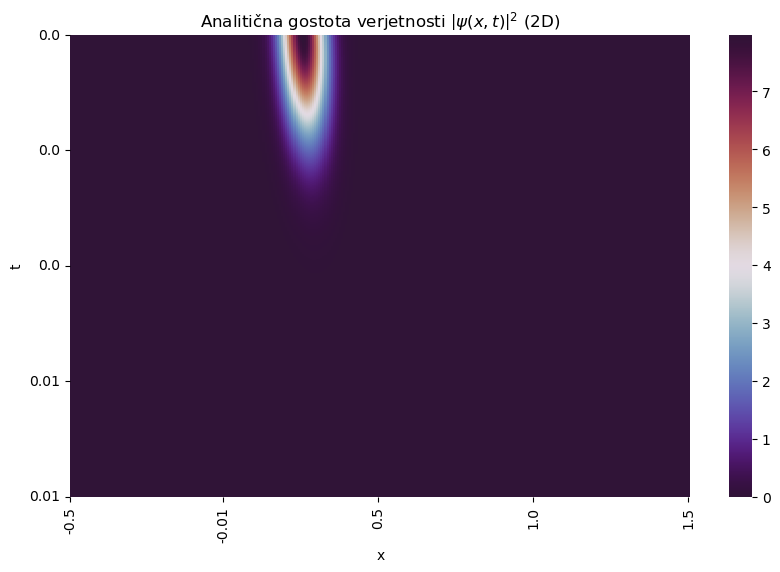

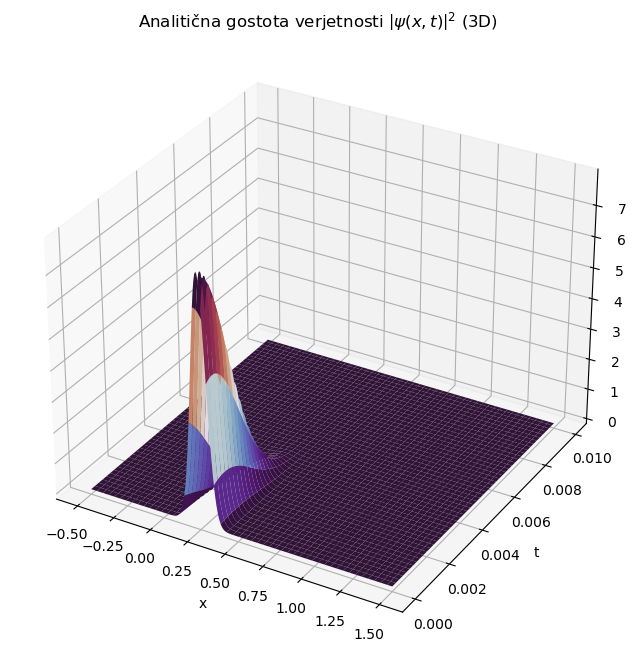

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sigma_0 = 1 / 20
k_0 = 50 * np.pi
lam = 0.25
a, b = -0.5, 1.5
N = 300  

x = np.linspace(a, b, N)
dx = (b - a) / (N - 1)
dt = 0.1 * dx**2
t = np.arange(0, 0.01, dt)
X, T = np.meshgrid(x, t)

def gauss_val_paket(x, t, sigma_0, k_0, lam):
    denominator = 1+ 1j * t / (2 * sigma_0)
    exponent = -(x-lam) ** 2 / (4 * sigma_0 ** 2) + 1j * k_0 * (x - lam) - 1j * k_0 ** 2 * t / 2
    return ((2 * np.pi * sigma_0 ** 2) ** (-1 / 4)) / np.sqrt(denominator) * np.exp(exponent / denominator)

Psi_t_anal = gauss_val_paket(X, T, sigma_0, k_0, lam)
Psi_t_anal_abs2 = np.abs(Psi_t_anal)**2

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(Psi_t_anal_abs2, cmap='twilight_shifted', ax=ax)
ax.set_title(r'Analitična gostota verjetnosti $\left|\psi(x,t)\right|^2$ (2D)')
ax.set_xlabel('x')
ax.set_ylabel('t')

x_tick_indices = np.linspace(0, len(x) - 1, 5).astype(int)
t_tick_indices = np.linspace(0, len(t) - 1, 5).astype(int)
ax.set_xticks(x_tick_indices)
ax.set_xticklabels(np.round(x[x_tick_indices], 2))
ax.set_yticks(t_tick_indices)
ax.set_yticklabels(np.round(t[t_tick_indices], 2))
plt.savefig('anal_gauss_2d')
plt.show()

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

Z_analytical = Psi_t_anal_abs2

if Z_analytical.shape[0] != len(t) or Z_analytical.shape[1] != len(x):
    Z_analytical = Z_analytical[:len(t), :len(x)]

ax.plot_surface(X, T, Z_analytical, cmap='twilight_shifted')
ax.set_title(r'Analitična gostota verjetnosti $\left|\psi(x,t)\right|^2$ (3D)')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel(r'$\left|\psi(x,t)\right|^2$')
plt.savefig('anal_gauss_3d')
plt.show()
